# 🧾 Task 7 - Basic Sales Summary using SQLite and Python

This notebook demonstrates how to:
- Create a SQLite database
- Insert sample sales data
- Run SQL queries
- Load data into pandas
- Plot a bar chart of revenue by product


In [1]:
# 📦 Step 1: Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 🗃 Step 2: Create SQLite database and insert sample data
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)''')

# Insert sample data
data = [
    ('Apple', 10, 0.5),
    ('Banana', 20, 0.2),
    ('Orange', 15, 0.3),
    ('Apple', 5, 0.5),
    ('Banana', 10, 0.2),
    ('Orange', 5, 0.3)
]
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', data)
conn.commit()

In [3]:
# 🔍 Step 3: Query the database for sales summary
query = '''
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''
df = pd.read_sql_query(query, conn)
df

,product,total_qty,revenue
0,Apple,15,7.5
1,Banana,30,6.0
2,Orange,20,6.0


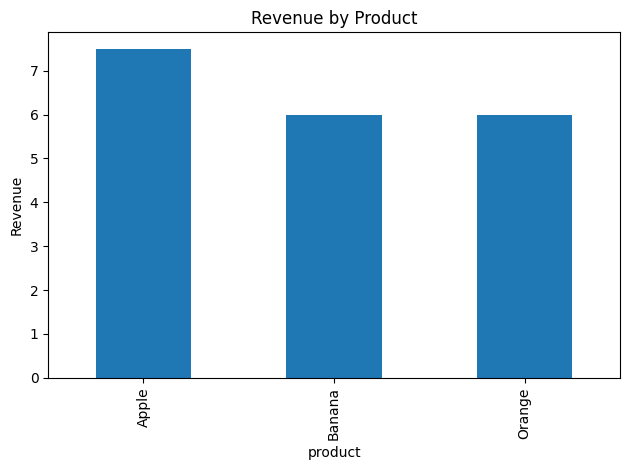

In [4]:
# 📊 Step 4: Plot revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

In [5]:
# 🔚 Close connection
conn.close()